Ref: https://www.datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/

In [1]:
from plotnine import *
from plotnine.options import figure_size
from plotnine.data import mpg, mtcars, diamonds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
?labs

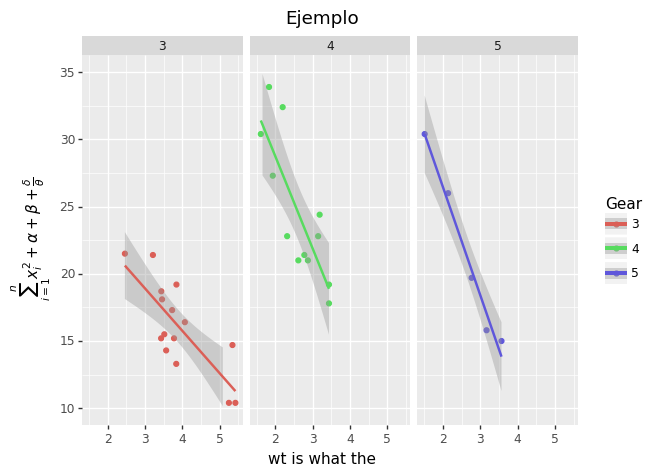

<ggplot: (-9223372036530487138)>

In [3]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
  + geom_point() # scatter
 + stat_smooth(method='lm') # linea smooth
 + facet_wrap('~gear')# lo separa en 3 graficos
 + labs(title='Ejemplo', x='wt is what the', color='Gear',
       y = "$\\sum_{i = 1}^n{x_i^2} + \\alpha + \\beta + \\frac{\\delta}{\\theta}$") # Latex
 + ylim(10, 35)) 

## Puntos

Si quieres cambiar las caracteristicas de todos los puntos para que sean iguales se ponen fuera de aes, si va a depender del valor de alguna variable se pone dentro de aes:
* alpha = transparencia
* color
* size
* shape:

<img src='imagen/shape_points.png' width=500 align=left> 

/Users/hitosvillarroel/Library/Python/3.6/lib/python/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


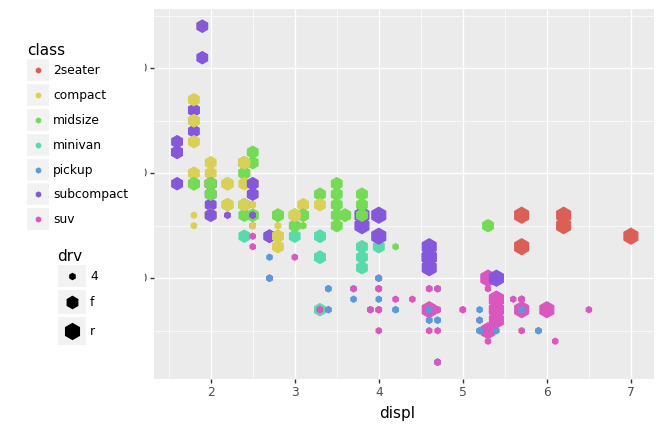

<ggplot: (-9223372036532646961)>

In [4]:
base = (ggplot(data=mpg) +
 geom_point(mapping = aes(x = 'displ', y = 'hwy', color = 'class', size = 'drv'), 
            shape='h',
            show_legend = True) # Para mostras la leyenda
)
base + theme(subplots_adjust={'left': 0.12}) + theme(legend_position=(0, 0.5))
#base + theme(legend_position="top")
#base + theme(subplots_adjust={'bottom': 0.3}, legend_position=(.5, 0), legend_direction='horizontal')

__jitter__ le mete un poco de ruido a cada punto para que se pueda ver donde hay mas densidad de puntos en el caso de existir muchos puntos exactamente iguales

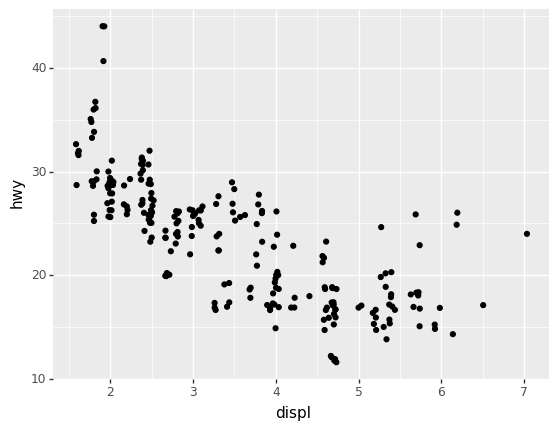

<ggplot: (-9223372036530490196)>

In [5]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), position="jitter")

## themes

<img src=imagen/theme.png width=500 align=left>

In [6]:
?panel_background

Object `panel_background` not found.


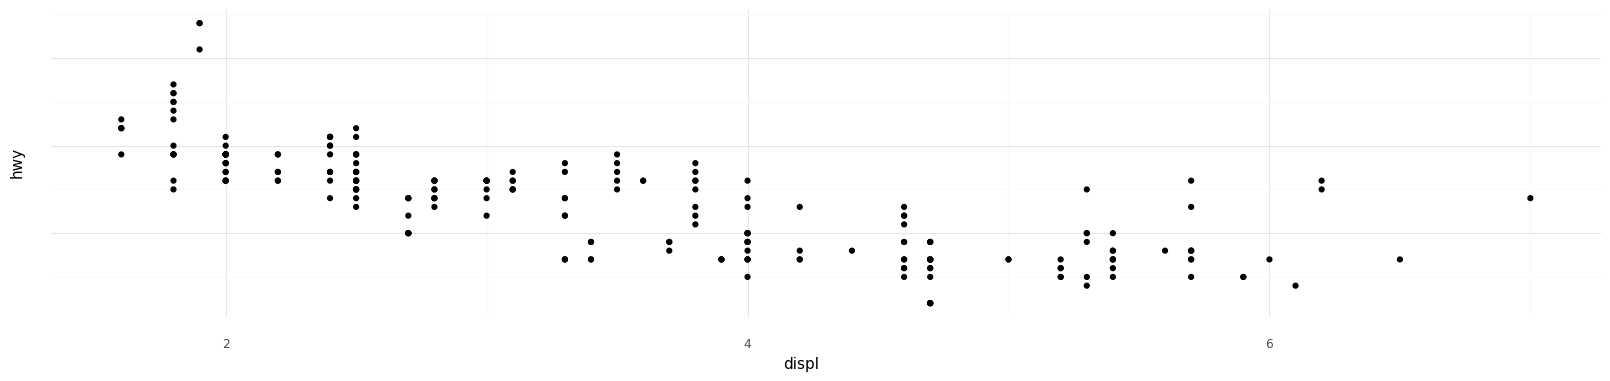

<ggplot: (-9223372036580418588)>

In [7]:
def no_labels(values):
    return [""] * len(values)

(ggplot(data=mpg) 
     + theme_minimal()
     + geom_point(mapping=aes(x="displ", y="hwy"))
     + scale_x_continuous(breaks=range(2, 8, 2))
     + scale_y_continuous(labels=no_labels)
     + theme(figure_size = (20, 4))


    )

## Lineas fijas


Use geom_rect() to draw a rectangle around points of interest. The boundaries of the rectangle are defined by aesthetics xmin, xmax, ymin, ymax.
Use geom_segment() with the arrow argument to draw attention to a point with an arrow. Use aesthetics x and y to define the starting location, and xend and yend to define the end location.

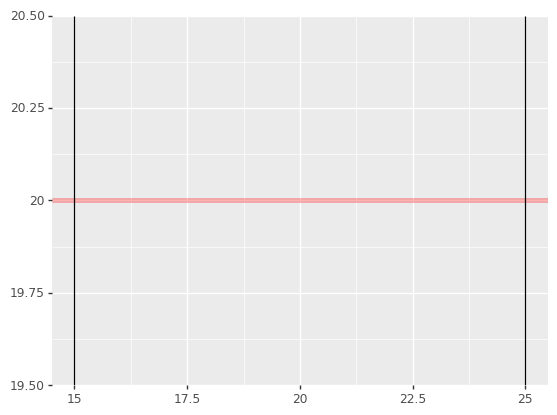

<ggplot: (-9223372036532692918)>

In [8]:
(ggplot() 
 + geom_hline(yintercept = 20, size=2, color = 'red', alpha=0.3)
 + geom_vline(xintercept = (15, 25))
)

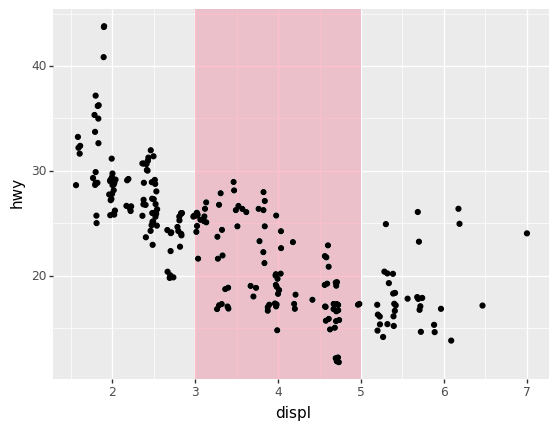

<ggplot: (274358406)>

In [9]:
(ggplot(data=mpg) 
+ geom_point(mapping=aes(x="displ", y="hwy"), position="jitter")
 + geom_rect(aes(xmin = 3, xmax = 5, ymin = float('-inf'), ymax = float("inf")),
            fill = "pink", alpha = 0.0051) 
)

## Facets o subplots by feature

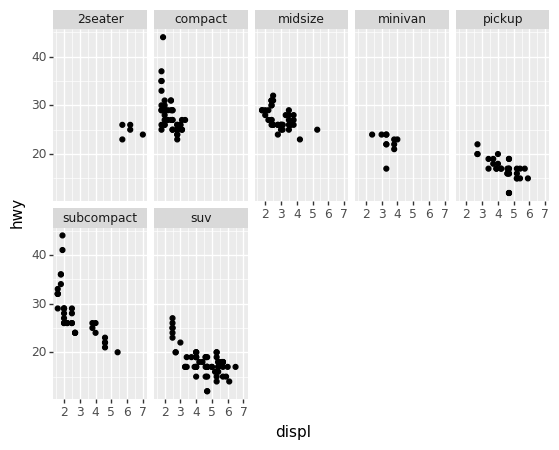

<ggplot: (-9223372036580405574)>

In [10]:
(ggplot(data=mpg) +
geom_point(mapping=aes(x="displ", y="hwy")) +
facet_wrap("class", nrow=3, ncol=5))

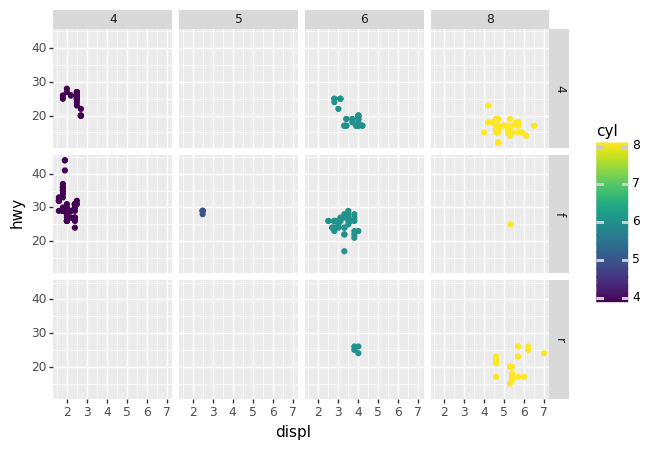

<ggplot: (322863294)>

In [11]:
# Con dos variables
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color ='cyl')) +\
facet_grid("drv ~ cyl") # you should usually put the variable with more unique levels in the columns

## Geom_smooth

 __se = True__ pinta el area (intervalo de confianza) alrededor de la linea 

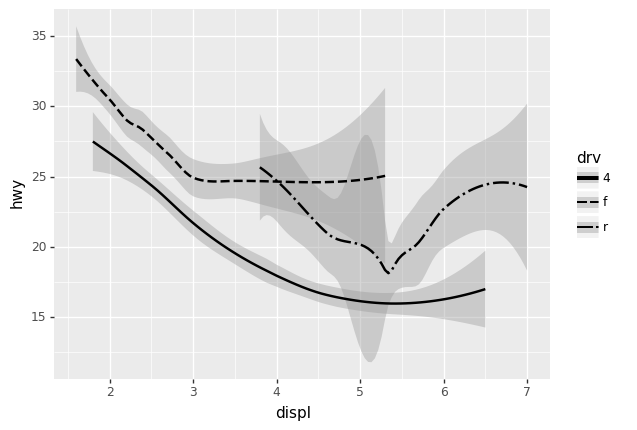

<ggplot: (323102535)>

In [12]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", linetype="drv"), se=True)

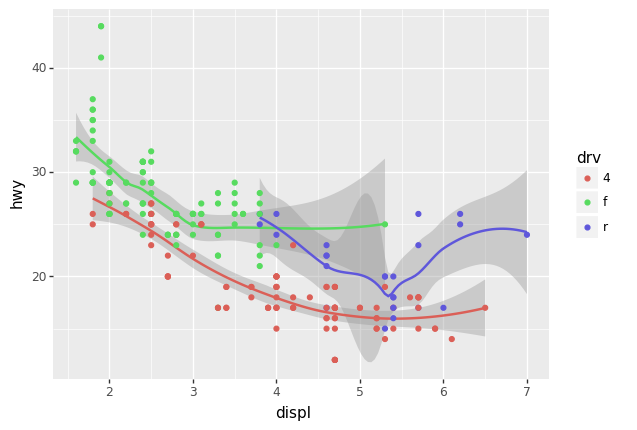

<ggplot: (-9223372036531589060)>

In [13]:
(ggplot(data=mpg) +
geom_smooth(mapping=aes(x="displ", y="hwy", color="drv"), show_legend=False) + 
 geom_point(mapping=aes(x="displ", y="hwy", color="drv"))

)

## Bars

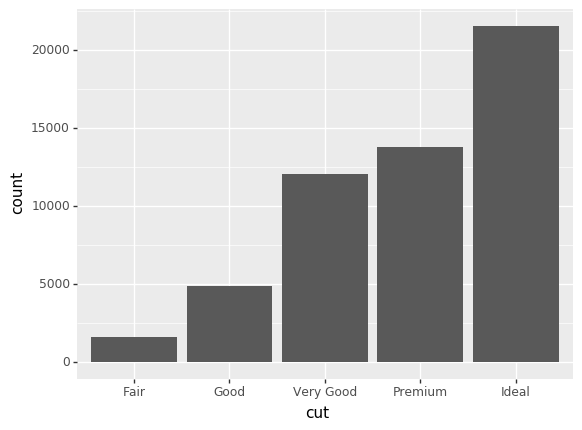

<ggplot: (-9223372036532666522)>

In [14]:
ggplot(data=diamonds) +\
stat_count(mapping=aes(x="cut"))

 __y = '..prop..'__ pinta porcentages en lugar de valores absolutos

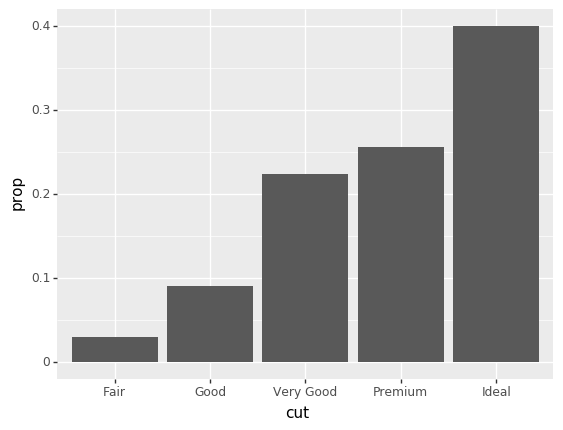

<ggplot: (323969074)>

In [15]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", y="..prop..", group=1)) # si no pones group salen todos al 100%

* __stat="identity"__ en lugar de contar los valores crea las barras con los datos exactos que se le pasan

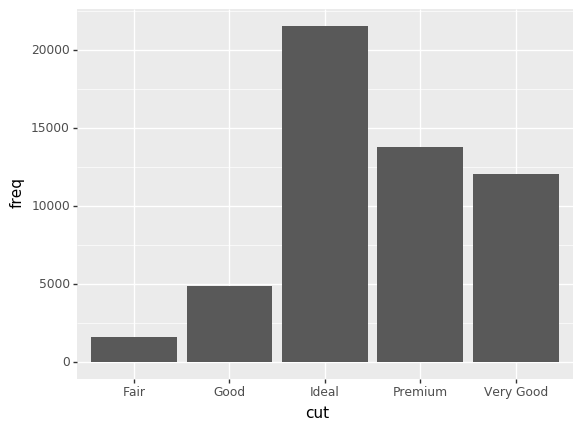

<ggplot: (323139087)>

In [16]:
demo = pd.DataFrame({"cut": ["Fair", "Good", "Very Good", "Premium", "Ideal"],
                     "freq": [1610, 4906, 12082, 13791, 21551]})
                         
ggplot(data=demo) +\
geom_bar(mapping=aes(x="cut", y="freq"), stat="identity")

* __fill__ rellena con color
* __colour__ borde con color

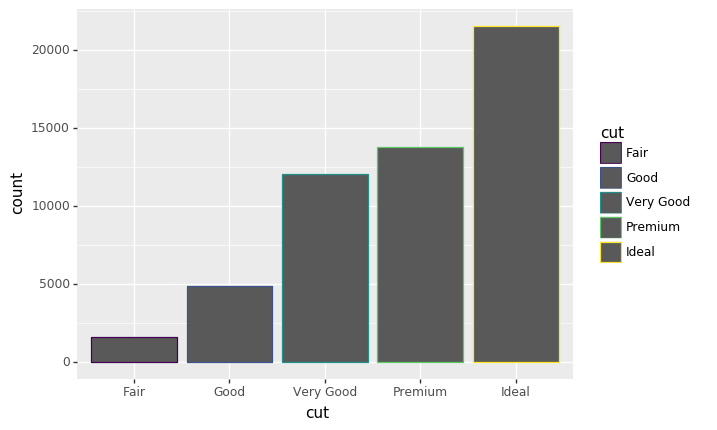

<ggplot: (-9223372036530847975)>

In [17]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", colour="cut"))

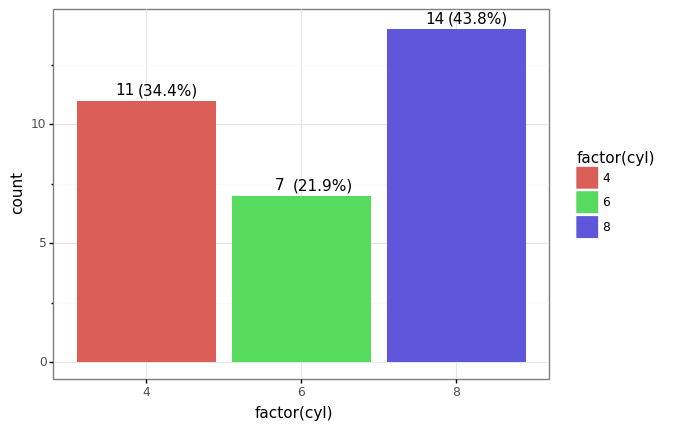

<ggplot: (-9223372036532731567)>

In [18]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + theme_bw()
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 )
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )
)

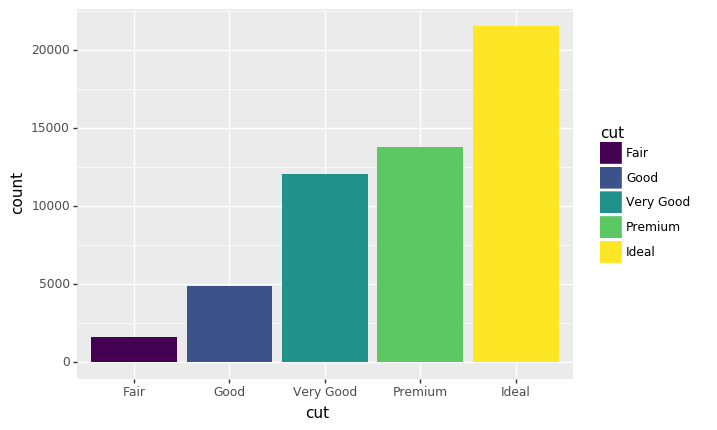

<ggplot: (-9223372036530952732)>

In [19]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="cut")) 

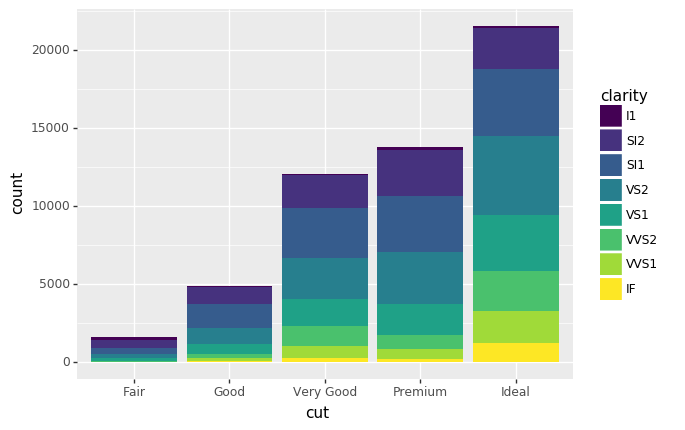

<ggplot: (322034261)>

In [20]:
(ggplot(data=diamonds) +
geom_bar(mapping=aes(x="cut", fill="clarity")))

* __position="identity"__ todas las barras empiezan en cero y hasta donde lleguen, por eso es bueno hacerlas transparantes(alpha) o vacias (fill=None)
* __position="fill"__ cada barra es el 100% y se amontonan las porciones una encima de otra
* __position='dodge'__ una barra al lado de la otra

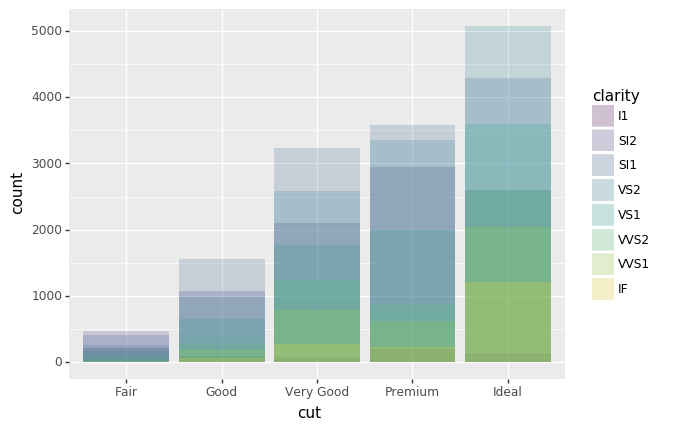

<ggplot: (-9223372036530930579)>

In [21]:
ggplot(data=diamonds, mapping=aes(x="cut", fill="clarity")) +\
geom_bar(alpha=1/5, position="identity")

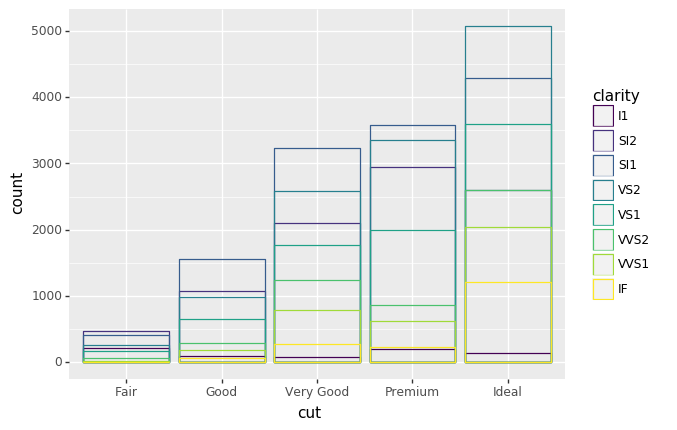

<ggplot: (323185258)>

In [22]:
ggplot(data=diamonds, mapping=aes(x="cut", colour="clarity")) +\
geom_bar(fill=None, position="identity")

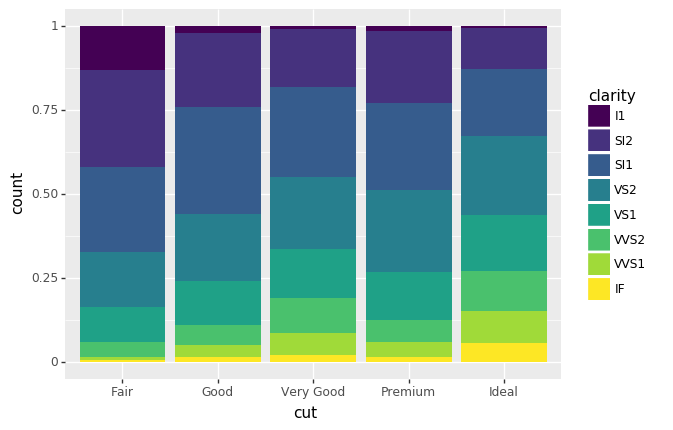

<ggplot: (327741069)>

In [23]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="fill")

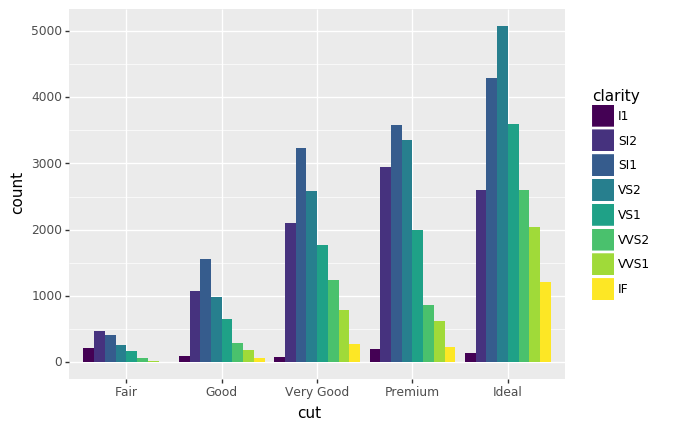

<ggplot: (323930614)>

In [24]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")

<img src='imagen/escalaColores.png'>

## Boxplots

In [25]:
?geom_boxplot

/Users/hitosvillarroel/Library/Python/3.6/lib/python/site-packages/plotnine/geoms/geom_crossbar.py:83: PlotnineWarning: Notch went outside hinges. Try setting notch=False.
  " Try setting notch=False.", PlotnineWarning)
/Users/hitosvillarroel/Library/Python/3.6/lib/python/site-packages/plotnine/geoms/geom_crossbar.py:83: PlotnineWarning: Notch went outside hinges. Try setting notch=False.
  " Try setting notch=False.", PlotnineWarning)


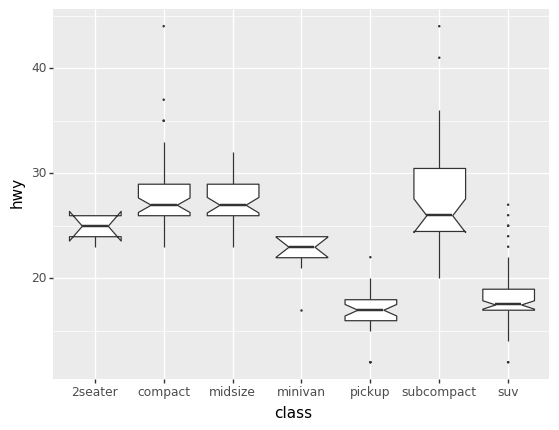

<ggplot: (323352959)>

In [26]:
ggplot(data=mpg, mapping=aes(x="class", y="hwy")) +\
geom_boxplot(notch=True, outlier_size=0)
    

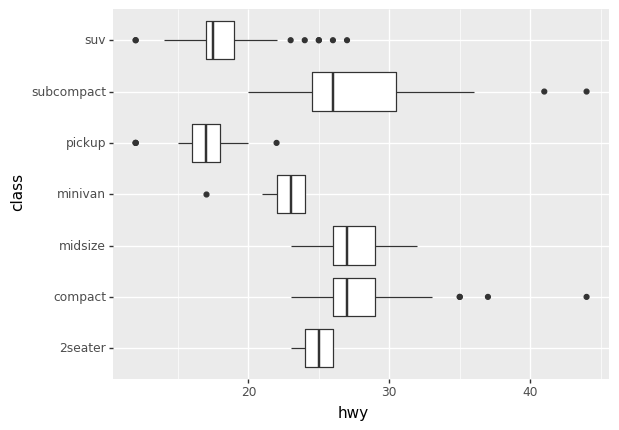

<ggplot: (323336659)>

In [27]:
ggplot(data=mpg, mapping=aes(x="class", y="hwy")) +\
geom_boxplot() +\
coord_flip()